# Primer Jupyter Notebook


In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_circles



(-1.2605476389405375,
 1.3090125494270053,
 -1.433828483962579,
 1.2926212050525656)

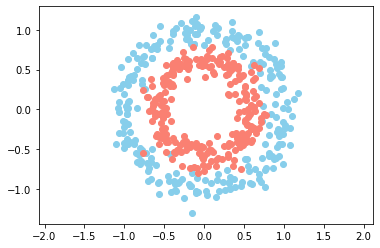

In [3]:
#Creamos el data set
n = 500
p = 2
X,Y = make_circles(n_samples=n , factor= 0.6, noise= 0.1, random_state=True)
Y = Y[:,np.newaxis]
plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], c = "salmon")
plt.axis("equal")

In [4]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1, n_neur)*2-1
        self.W = np.random.rand(n_conn, n_neur)*2-1

In [7]:
## Funciones de activacion
sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x * (1-x))
_x = np.linspace(-5,5,100)

In [12]:
def create_nn(topo, act_f):
    nn = [] #vector de capas
    for l, layer in enumerate(topo[:-1]):
        nn.append(neural_layer(topo[l],topo[l+1], act_f))
    return nn


In [13]:
topo = [p, 4, 8, 1]
neural_net = create_nn(topo, sigm)
cost = (lambda yp,yr: np.mean((yp-yr)**2),
        lambda yp,yr: (yp-yr))
def train(neural_net, X, Y, cost, lr = 0.5, train = True):
    out = [(None, X)]        